# Data visualization, pt. 3 (principles)

## Goals of this lecture

We've already covered the basics of **creating** data visualizations using `pyplot` and `seaborn`.

In this lecture, we'll discuss some **principles** of data visualization.

- **Taxonomy of plot types**: what plot to use, when?
   - Just a rough guide––context always matters.
- **Principles**, and **what to avoid**. 
- Additional considerations.

## Import relevant libraries

In [1]:
import seaborn as sns ### importing seaborn
import pandas as pd
import matplotlib.pyplot as plt ## just in case we need it

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Taxonomy of plot types

### Rough guide: what plot to use, when?

| How many variables? | What kind of variable(s)? | Plot types | `seaborn` |
| ------------------- | ----------------------- | ---------- | --------------- |
| 1 | Continuous | Histogram | `seaborn.histplot`|
| 1 | Categorical | Count plot | `seaborn.countplot`|
| 2 | Cont. `x`, cont. `y` | Scatter, line | `seaborn.relplot`|
| 2 | Cat. `x`, cont. `y` | Bar, box, strip | `seaborn.catplot`|

### What about $>2$ variables?

It depends on the **type** of variables.

Rough guide:

- 2 continuous, 1 categorical: `seaborn.relplot` with `hue`
- 2 categorical, 1 continuous: `seaborn.catplot` with `hue`
- 3 continuous: `seaborn.relplot` with `size` or `hue`


## Principles, and *what to avoid*

- In this section, we'll propose and discuss possible *principles* behind building better visualizations.
- Many of these principles are *context-dependent*, and not without disagreement.

This section is closely modeled on [Chapter 1 of Kieran Healy's Data Visualization](https://socviz.co/lookatdata.html#why-look-at-data).

### What makes for a good visualization?

In [The visual display of quantitative information](https://www.edwardtufte.com/tufte/books_vdqi), Edward Tufte argues:

> Graphical excellence is the well-designed presentation of interesting data—a matter of substance, of statistics, and of design … [It] **consists of complex ideas communicated with clarity, precision, and efficiency.** … [It] is that which gives to the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space … [It] is nearly always multivariate … And graphical excellence requires telling the truth about the data. (Tufte, 1983, p. 51).

This is true, but also very general––can we be more specific?

### Different kinds of bad?

The sociologist [Kieran Healy](https://kieranhealy.org/) points out that graphs can be "bad" in different ways.

1. *Aesthetic*: graph design is aesthetically unappealing.
2. *Substantive*: either the data or its presentation (or both) have fundamental problems. 
3. *Perceptual*: the graph is misleading because of how people perceive and process what they're looking at.

### Bad taste

Many graphs have aesthetic features that are *overly complex* given what they're trying to convey.

- **3D bar plots** despite no need for three dimensions. 
- Other aesthetic features like drop shadow. 

These features can needlesly "complexify" a graph, **making it harder to interpret**.

#### An overly complex graph

![title](img/viz/ch-01-chartjunk-life-expectancy.png)

#### Principle 1: Maximize data-to-ink ratio

- One suggestion is to **maximize the data-to-ink ratio**.
- Don't add aesthetic features unless they *convey information*.  

However...there's evidence that *some* aesthetically complex figures are *easier to remember*. So it depends!

### Bad data

No amount of elegant aesthetics can make up for bad data! 

Healy uses the [example of a graph from the New York Times](https://socviz.co/lookatdata.html#why-look-at-data). This graph is **misleading**:

- About the `x`-axis: implies same people at different time, when it's actually people of different *ages* at the same time.
- About the `y`-axis: implies yes/no question, when it's subsetting responses to a 10-point scale.

#### Principle 2: Be true to the data

Your visualization should represent *what the data measures*.

(This one's not really context-dependent! Always be true to the data.)

### Bad perception

Finally, graphs can be **misleading** because their aesthetics imply something *incorrect* about the data.

> Visualizations encode numbers in lines, shapes, and colors. That means that our interpretation of these encodings is partly conditional on how we perceive geometric shapes and relationships generally.  (Healy, [Data Visualization](https://socviz.co/lookatdata.html#why-look-at-data)).

#### Bar plots and the principle of proportional ink

A key *aesthetic feature* of bar plots is the **amount of ink** devoted to a bar.

- As viewers, our eyes measure the **relative difference** in how much space is devoted to each bar.
- Larger perceptual differences imply larger **magnitude differences**. 

This principle can be **violated** in several ways.

##### Truncated y-axis exaggerates differences

![title](img/viz/GTAI_average_hours.png)

[Source: Calling Bullshit](https://www.callingbullshit.org/tools/tools_misleading_axes.html)


##### Bars should be of equal width

![title](img/viz/proportional_ink.png)

[Source: Witte and Witte](https://www.wiley.com/en-us/Statistics,+11th+Edition-p-9781119254515).

#### When *not* to start at zero?

- Bar plots should start at zero.
- But in many cases, starting at zero can actually be misleading. 
   - With line plots, the goal is to show the **relative difference in *position***.
   - With very large `y`-axis values, starting at zero can be confusing.

##### When relative change is what matters (pt. 1)

This graph shows changes in `temperature` (Celsius) over `Year`, and starts at 0.

(0.0, 14.905095)

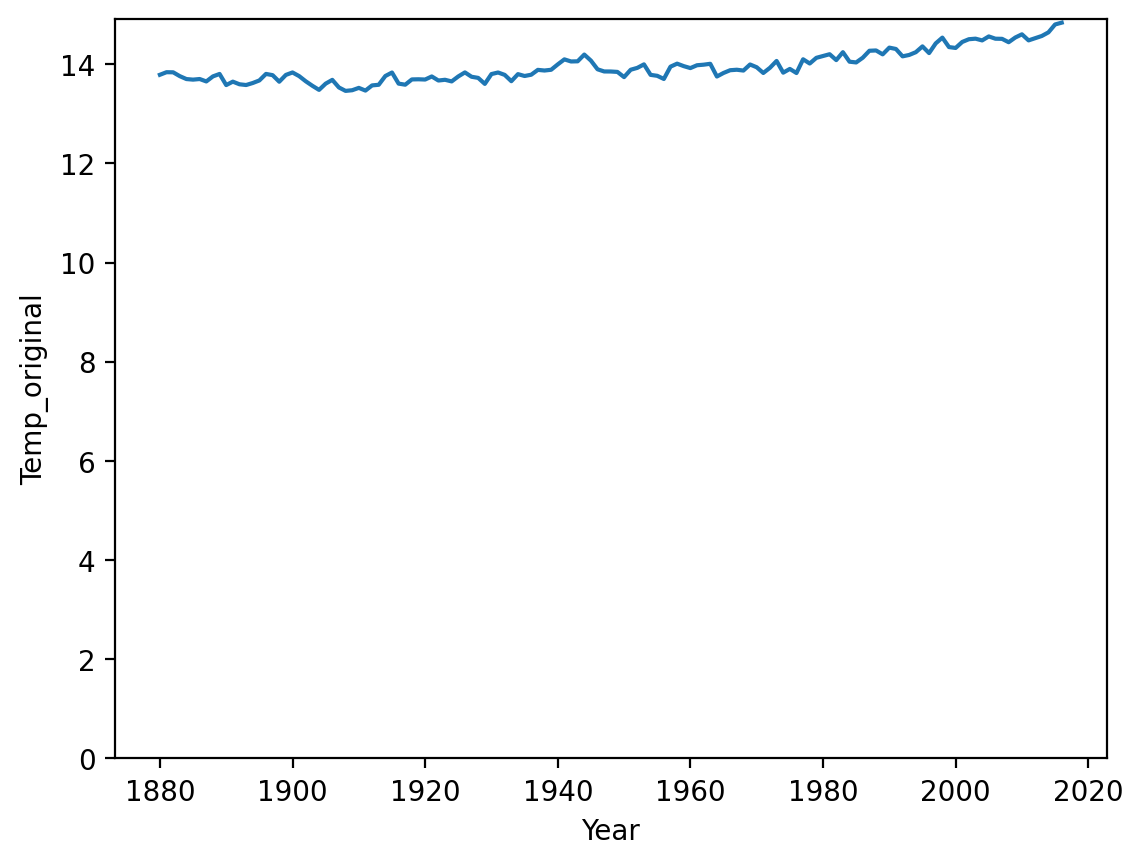

In [3]:
df_temp = pd.read_csv("data/viz/temp.csv")
sns.lineplot(data = df_temp, x = 'Year', y = 'Temp_original')
plt.ylim(0)

##### When relative change is what matters (pt. 2)

This graph shows changes in `temperature` (Celsius) over `Year`, but doesn't start at 0.

<Axes: xlabel='Year', ylabel='Temp_original'>

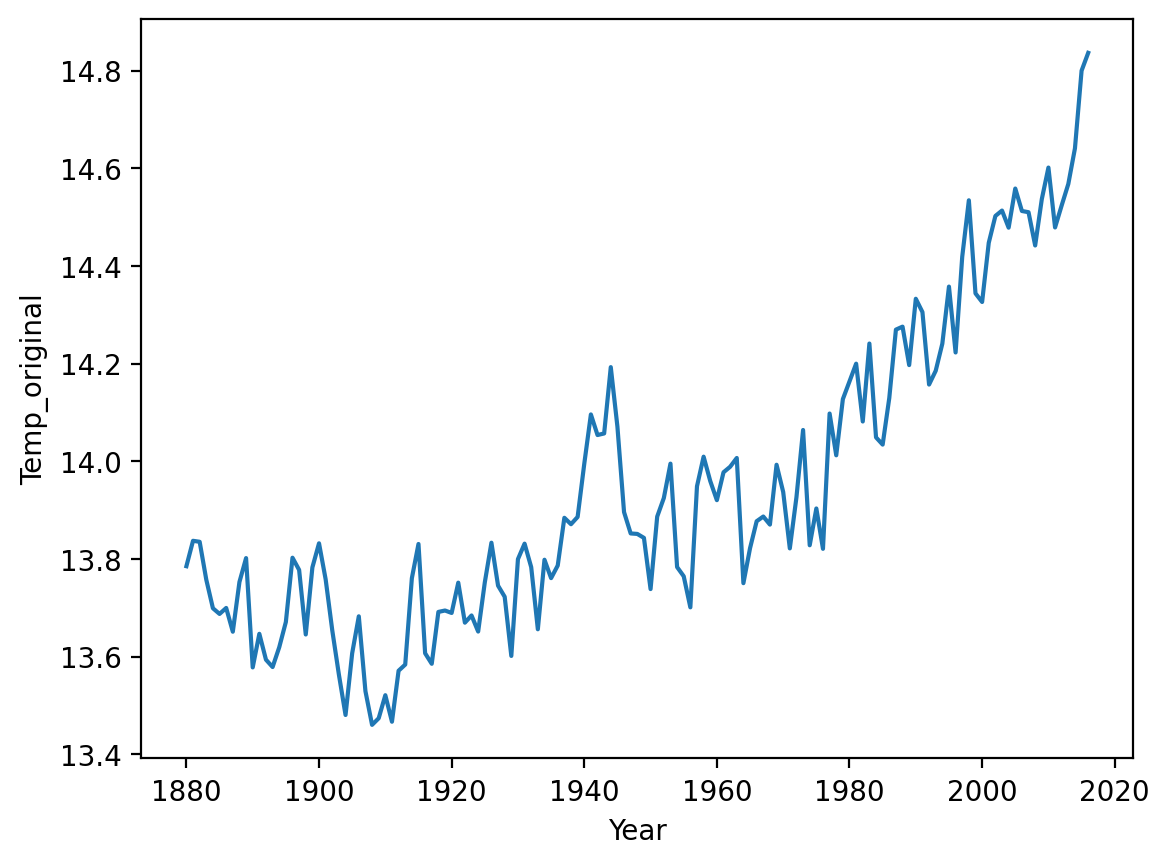

In [4]:
sns.lineplot(data = df_temp, x = 'Year', y = 'Temp_original')

### Summing up: principles and practice

We've discussed several principles (and corresponding *practices to avoid*):

1. **Principle 1**: Maximize data-ink ratio.
2. **Principle 2**: Be true to the data. 
3. **Principle 3**: Be true to what the *visual logic* of your graph implies.

## Additional considerations

Data visualization could make up an entire course (or [textbook](https://socviz.co/lookatdata.html#why-look-at-data)). 

But there are several other common issues to discuss:

- Should I show the *mean* (or median, etc.) or the *raw data*?
- Should I exclude outliers?
- Should I *transform* my data (e.g., to a log-scale)?

### Should I show the "raw data"?

All measures of **central tendency** (e.g., `mean`, `median`) are a *simplification* of our data.

- Thus, showing only the mean "hides" much of your data.  
- However, if the `mean` is what you *care* about, then the raw data can be overly complex.

Personally, I try to show the *raw data* where possible––along with the mean.

#### Showing *both* the summary and raw data

<Axes: xlabel='Legendary', ylabel='Attack'>

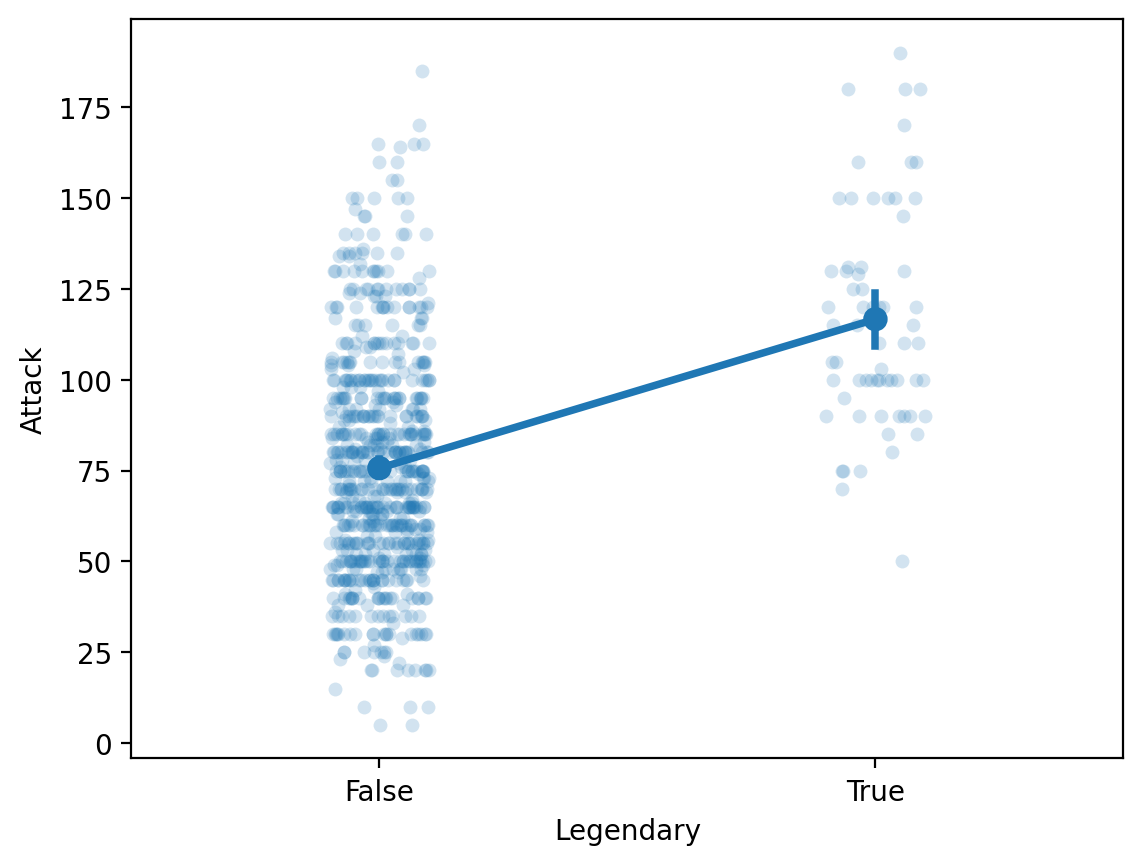

In [5]:
df_pokemon = pd.read_csv("data/pokemon.csv")
sns.stripplot(data = df_pokemon, x = "Legendary", y = "Attack", alpha = .2)
sns.pointplot(data = df_pokemon, x = "Legendary", y = "Attack")

### Should I exclude outliers?

> **Outliers** are data points that differ significantly from other points in a distribution.

Including outliers in a visualization can be confusing.

- They lengthen the axis despite being unrepresentative of the data.
- They can distract from the main point you want to convey.

**Should you remove them?**

#### Be transparent about exclusion

- This one is very context-dependent.  
- Personally, I *usually don't* exclude outliers. 
- But if you do exclude them, **be very clear about your decision**.
   - Ideally, this decision would be "pre-registered" ahead of time.
   
Next week, we'll discuss how to define/detect outliers using [**z-scores**](https://en.wikipedia.org/wiki/Standard_score).

### Should I transform my data?

Sometimes, the "raw" data is heavily skewed.

- A **log transform** can turn *right-skewed* data look more ["normal"](https://en.wikipedia.org/wiki/Normal_distribution). 
- When is this a good or bad idea?

#### Right-skewed data can be confusing

<Axes: xlabel='population', ylabel='Count'>

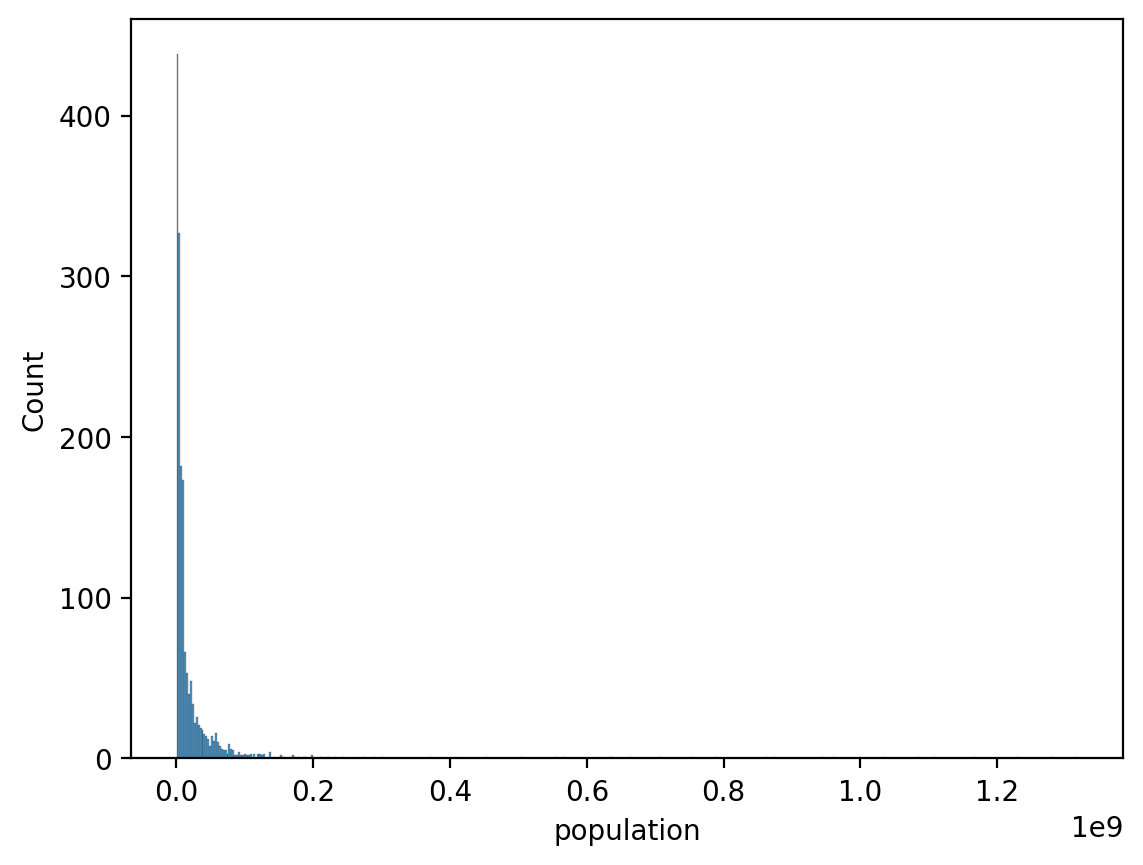

In [6]:
df_gapminder = pd.read_csv("data/viz/gapminder_full.csv")
sns.histplot(data = df_gapminder, x = 'population')

#### Log-transforms make it look more normal

<Axes: xlabel='population', ylabel='Count'>

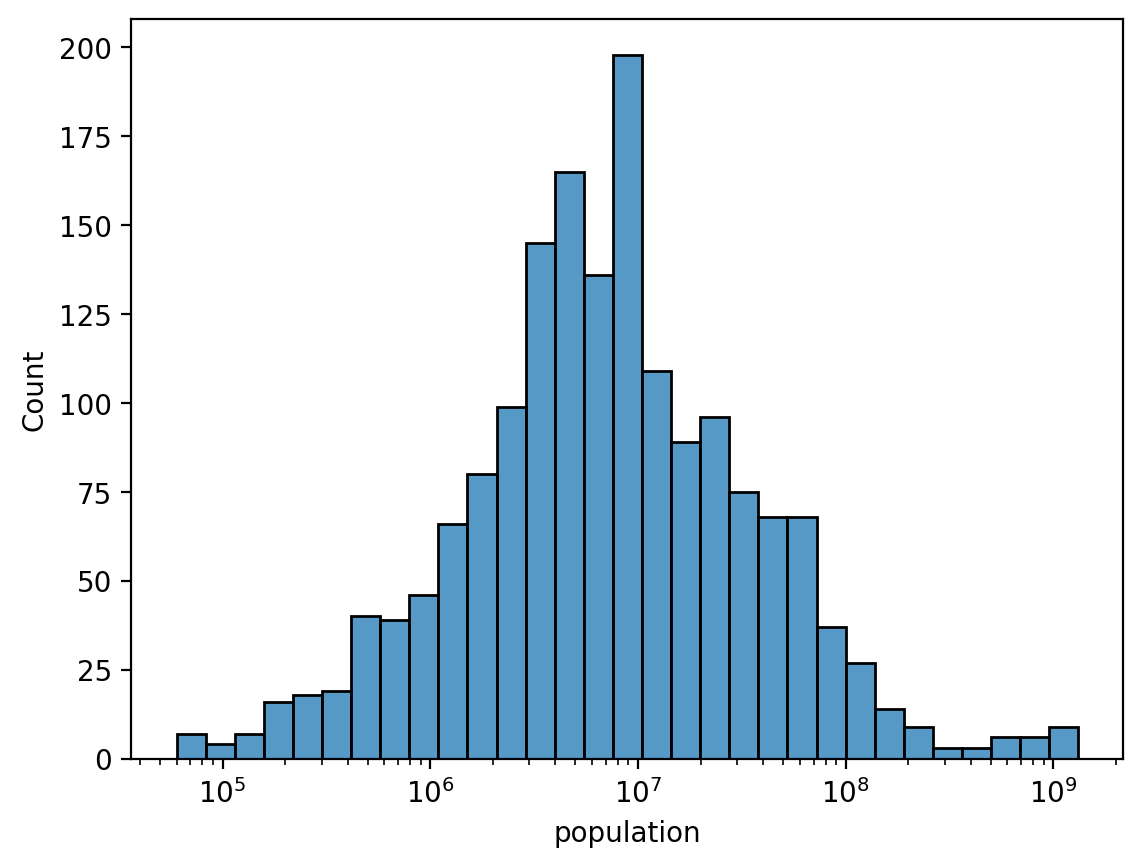

In [7]:
sns.histplot(data = df_gapminder, x = 'population', log_scale=True)

#### But what's "correct"?

Considerations to keep in mind:

- Is there reason to think that this variable **scales logarithmically**?
- Is there reason to think that this variable's relationship with *other variables* **scales logarithmically**?
- Will I be presenting this figure to an audience who **understands logarithmic scaling**? 

In terms of *interpretation*:

- A logarithmic scale implies **multiplicative/relative** changes.
- A linear scale implies **additive/absolute** changes.

## Conclusion

Data visualization is *central* to [Computational Social Science](https://en.wikipedia.org/wiki/Computational_social_science). This week has focused on the *how* (`seaborn` and `pyplot`) as well as *principles* to keep in mind.

For further reference, see:

- [Calling Bullshit](https://www.callingbullshit.org/syllabus.html#Visual).
- [Data Visualization](https://socviz.co/lookatdata.html#why-look-at-data). 
- [How to lie with statistics](https://en.wikipedia.org/wiki/How_to_Lie_with_Statistics).
- [The visual display of quantitative information](https://www.edwardtufte.com/tufte/books_vdqi).
